# Housing Prices in Tehran
## Estimating the Price of a New House

### This dataset contains information for approximately 4000 apartments in Tehran, with the following features:
1. Area (square meters)  
2. Number of Rooms  
3. Parking (Yes/No)  
4. Warehouse (Yes/No)  
5. Elevator (Yes/No)  
6. Address  
7. Price (Toman)  
8. Price (USD)

🔍 **Note:**  
Some entries in the dataset are missing addresses or contain incorrect values for area (e.g., extremely large numbers).  
These invalid rows must be removed before training the model and making predictions.


## Imports 

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score

## Data set 

In [44]:
df = pd.read_csv('housePrice.csv')
df.head(10)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
5,70,2,True,True,False,North Program Organization,2.050000e+09,68333.33
6,87,2,True,True,True,Pardis,6.000000e+08,20000.00
7,59,1,True,True,True,Shahran,2.150000e+09,71666.67
8,54,2,True,True,False,Andisheh,4.930000e+08,16433.33
9,71,1,True,True,True,West Ferdows Boulevard,2.370000e+09,79000.00


In [45]:
df.tail()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
3474,86,2,True,True,True,Southern Janatabad,3.500000e+09,116666.67
3475,83,2,True,True,True,Niavaran,6.800000e+09,226666.67
3476,75,2,False,False,False,Parand,3.650000e+08,12166.67
3477,105,2,True,True,True,Dorous,5.600000e+09,186666.67
3478,82,2,False,True,True,Parand,3.600000e+08,12000.00


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   object 
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   float64
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 146.2+ KB


In [47]:
df.describe()

,Room,Price,Price(USD)
count,3479.000000,3.479000e+03,3.479000e+03
mean,2.079908,5.359023e+09,1.786341e+05
std,0.758275,8.099935e+09,2.699978e+05
min,0.000000,3.600000e+06,1.200000e+02
25%,2.000000,1.418250e+09,4.727500e+04
50%,2.000000,2.900000e+09,9.666667e+04
75%,2.000000,6.000000e+09,2.000000e+05
max,5.000000,9.240000e+10,3.080000e+06


## Data Cleaning 

In [48]:
df['Address'].isnull().sum()

np.int64(23)

In [49]:
df= df.dropna(subset=['Address'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3456 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3456 non-null   object 
 1   Room        3456 non-null   int64  
 2   Parking     3456 non-null   bool   
 3   Warehouse   3456 non-null   bool   
 4   Elevator    3456 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3456 non-null   float64
 7   Price(USD)  3456 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 172.1+ KB


In [50]:
df['Area'] = pd.to_numeric(df['Area'], errors='coerce')

df = df[(df['Area'] >= 30) & (df['Area'] <= 500)]
df= df.dropna(subset=['Area'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3433 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3433 non-null   float64
 1   Room        3433 non-null   int64  
 2   Parking     3433 non-null   bool   
 3   Warehouse   3433 non-null   bool   
 4   Elevator    3433 non-null   bool   
 5   Address     3433 non-null   object 
 6   Price       3433 non-null   float64
 7   Price(USD)  3433 non-null   float64
dtypes: bool(3), float64(3), int64(1), object(1)
memory usage: 171.0+ KB


In [51]:
df['Elevator'] = df['Elevator'].astype(int)
df['Parking'] = df['Parking'].astype(int)
df['Warehouse'] = df['Warehouse'].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3433 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3433 non-null   float64
 1   Room        3433 non-null   int64  
 2   Parking     3433 non-null   int64  
 3   Warehouse   3433 non-null   int64  
 4   Elevator    3433 non-null   int64  
 5   Address     3433 non-null   object 
 6   Price       3433 non-null   float64
 7   Price(USD)  3433 non-null   float64
dtypes: float64(3), int64(4), object(1)
memory usage: 241.4+ KB



we uese one hot coding method for numerical column address .

In [52]:
address_dummies = pd.get_dummies(df['Address'], prefix='Addr')
df = pd.concat([df, address_dummies], axis=1)
df = df.drop('Address', axis=1)


## Data visualization
 

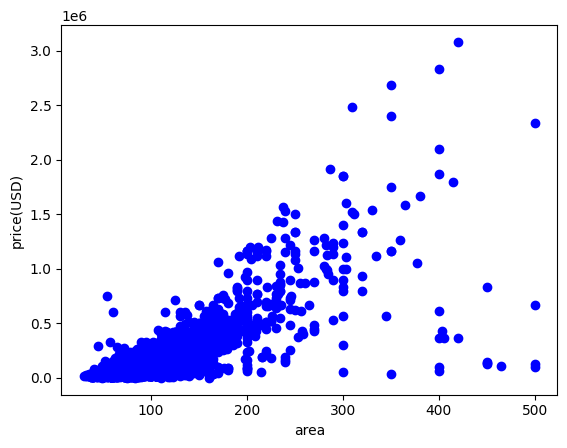

In [93]:
plt.scatter(df[['Area']],df[['Price(USD)']], color = 'blue')
plt.xlabel('area')
plt.ylabel('price(USD)')
plt.show()

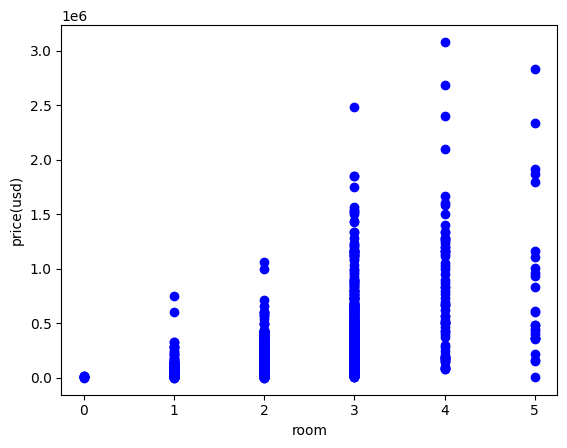

In [54]:
plt.scatter(df[['Room']],df[['Price(USD)']], color = 'blue')
plt.xlabel('room')
plt.ylabel('price(usd)')
plt.show()

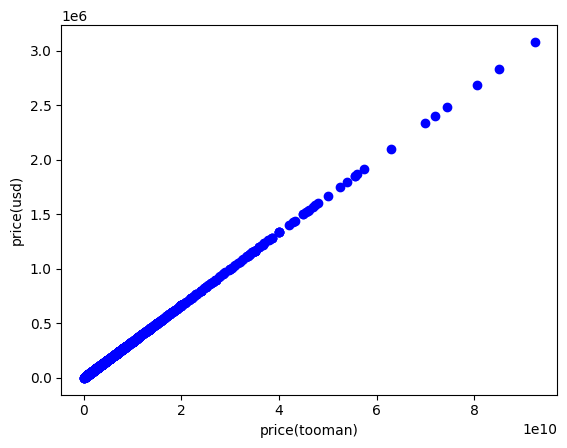

In [55]:
plt.scatter(df[['Price']],df[['Price(USD)']], color = 'blue')
plt.xlabel('price(tooman)')
plt.ylabel('price(usd)')
plt.show()

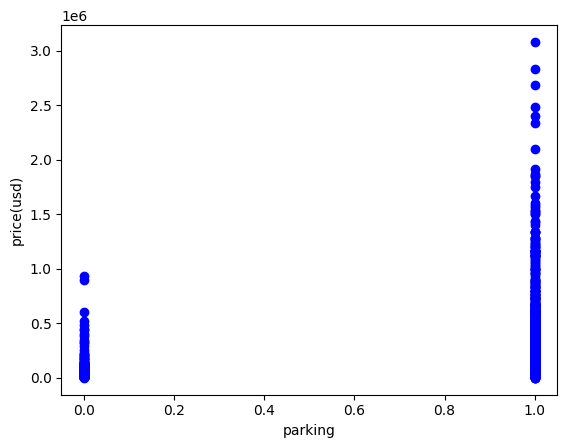

In [94]:

plt.scatter(df[['Parking']],df[['Price(USD)']], color = 'blue')
plt.xlabel('parking')
plt.ylabel('price(usd)')
plt.show()

In [62]:
df.head(10)

,Area,Room,Parking,Warehouse,Elevator,Price,Price(USD),Addr_Abazar,Addr_Abbasabad,Addr_Absard,...,Addr_Waterfall,Addr_West Ferdows Boulevard,Addr_West Pars,Addr_Yaftabad,Addr_Yakhchiabad,Addr_Yousef Abad,Addr_Zafar,Addr_Zaferanieh,Addr_Zargandeh,Addr_Zibadasht
0,63.0,1,1,1,1,1.850000e+09,61666.67,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,60.0,1,1,1,1,1.850000e+09,61666.67,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,79.0,2,1,1,1,5.500000e+08,18333.33,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,95.0,2,1,1,1,9.025000e+08,30083.33,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,123.0,2,1,1,1,7.000000e+09,233333.33,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,70.0,2,1,1,0,2.050000e+09,68333.33,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,87.0,2,1,1,1,6.000000e+08,20000.00,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,59.0,1,1,1,1,2.150000e+09,71666.67,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,54.0,2,1,1,0,4.930000e+08,16433.33,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,71.0,1,1,1,1,2.370000e+09,79000.00,False,False,False,...,False,True,False,False,False,False,False,False,False,False


In [64]:
df = df.astype(float)
df.head()

,Area,Room,Parking,Warehouse,Elevator,Price,Price(USD),Addr_Abazar,Addr_Abbasabad,Addr_Absard,...,Addr_Waterfall,Addr_West Ferdows Boulevard,Addr_West Pars,Addr_Yaftabad,Addr_Yakhchiabad,Addr_Yousef Abad,Addr_Zafar,Addr_Zaferanieh,Addr_Zargandeh,Addr_Zibadasht
0,63.0,1.0,1.0,1.0,1.0,1.850000e+09,61666.67,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,60.0,1.0,1.0,1.0,1.0,1.850000e+09,61666.67,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,79.0,2.0,1.0,1.0,1.0,5.500000e+08,18333.33,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,95.0,2.0,1.0,1.0,1.0,9.025000e+08,30083.33,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,123.0,2.0,1.0,1.0,1.0,7.000000e+09,233333.33,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
df.describe()

,Area,Room,Parking,Warehouse,Elevator,Price,Price(USD),Addr_Abazar,Addr_Abbasabad,Addr_Absard,...,Addr_Waterfall,Addr_West Ferdows Boulevard,Addr_West Pars,Addr_Yaftabad,Addr_Yakhchiabad,Addr_Yousef Abad,Addr_Zafar,Addr_Zaferanieh,Addr_Zargandeh,Addr_Zibadasht
count,3433.000000,3433.000000,3433.000000,3433.000000,3433.000000,3.433000e+03,3.433000e+03,3433.000000,3433.000000,3433.000000,...,3433.000000,3433.000000,3433.000000,3433.000000,3433.000000,3433.000000,3433.000000,3433.000000,3433.000000,3433.000000
mean,104.018060,2.074279,0.847364,0.915234,0.790271,5.212296e+09,1.737432e+05,0.006408,0.000583,0.001165,...,0.000874,0.042237,0.003204,0.000874,0.000291,0.011069,0.002622,0.007865,0.001165,0.000291
std,55.595229,0.748359,0.359689,0.278573,0.407175,7.404752e+09,2.468251e+05,0.079807,0.024133,0.034120,...,0.029553,0.201159,0.056523,0.029553,0.017067,0.104641,0.051142,0.088347,0.034120,0.017067
min,30.000000,0.000000,0.000000,0.000000,0.000000,3.600000e+06,1.200000e+02,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,68.000000,2.000000,1.000000,1.000000,1.000000,1.400000e+09,4.666667e+04,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,90.000000,2.000000,1.000000,1.000000,1.000000,2.850000e+09,9.500000e+04,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,120.000000,2.000000,1.000000,1.000000,1.000000,6.000000e+09,2.000000e+05,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,500.000000,5.000000,1.000000,1.000000,1.000000,9.240000e+10,3.080000e+06,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##  Splitting data into train and test sets


In [90]:
x = df.drop(['Price','Price(USD)'] , axis= 1)
y = df[['Price']]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=43)

regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)

y_predict = regr.predict(X_test)

acuuracy = r2_score(y_predict,y_test)

print('accuracy r2-score  for this modle is : %f' % acuuracy)


accuracy r2-score  for this modle is : 0.720624


## visualize predict with real values 

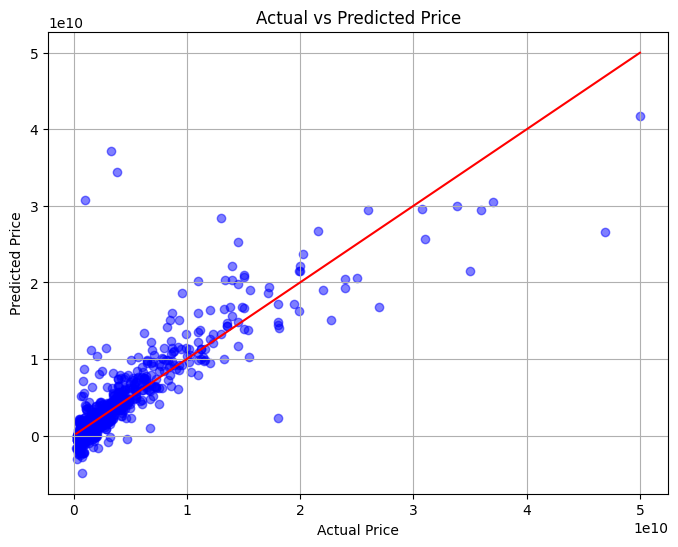

In [92]:

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_predict, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='-')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.grid(True)
plt.show()
